In [111]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
import scipy as sp
import scipy.interpolate

In [183]:
x = np.loadtxt('yield_DS_keith100.dat', dtype=str).T

In [184]:
energies, yieldperann = np.loadtxt('test_darksusy.csv', dtype = 'float', delimiter = ',').T
energies = energies*1e3

In [185]:
energies = x[1].astype(np.float)*1e3 #in MeV
yieldperann = x[2].astype(np.float)/1e3 #in per MeV

highe = 8.14008272e+05

lowe = 1e5

In [186]:
print(np.nanmax(energies))

99988.8


In [187]:
good_energies = np.where((energies <=highe) & (energies >= lowe))

In [188]:
print(len(good_energies[0]))

0


In [130]:
final_integral = np.trapz(yieldperann[good_energies], x = energies[good_energies])

In [131]:
print(final_integral)

15.668602483449998


In [114]:
def log_interp1d(xx, yy, kind='linear'):
    logx = np.log10(xx)
    logy = np.log10(yy)
    lin_interp = sp.interpolate.interp1d(logx, logy, kind=kind)
    log_interp = lambda zz: np.power(10.0, lin_interp(np.log10(zz)))
    return log_interp

In [115]:
xarr = np.logspace(np.log10(np.nanmin(correct_plot[0])), np.log10(np.nanmax(correct_plot[0])), num = 100)
yarr = log_interp1d(correct_plot[0], correct_plot[1])

In [116]:
print(xarr)

[  1.08956406   1.15229269   1.21863274   1.28879214   1.36299077
   1.44146118   1.52444931   1.61221525   1.70503406   1.80319667
   1.90701071   2.01680156   2.13291332   2.25570988   2.38557612
   2.52291904   2.6681691    2.82178154   2.98423778   3.15604698
   3.33774763   3.52990919   3.73313391   3.94805874   4.17535726
   4.41574187   4.66996596   4.93882629   5.2231655    5.52387476
   5.84189652   6.1782275    6.53392181   6.91009422   7.30792372
   7.72865715   8.17361313   8.64418623   9.14185126   9.66816798
  10.22478592  10.81344959  11.43600394  12.09440013  12.79070166
  13.52709081  14.30587552  15.12949661  16.00053539  16.92172181
  17.89594298  18.92625224  20.01587868  21.16823735  22.38693987
  23.67580581  25.03887463  26.48041835  28.00495495  29.61726251
  31.32239421  33.12569413  35.03281404  37.04973109  39.18276654
  41.43860558  43.8243183   46.34738181  49.0157037   51.83764681
  54.82205547  57.97828318  61.31622193  64.84633325  68.57968093
  72.52796

Text(0, 0.5, '$\\frac{dN}{dt}$ (GeV$^{-1}$)')

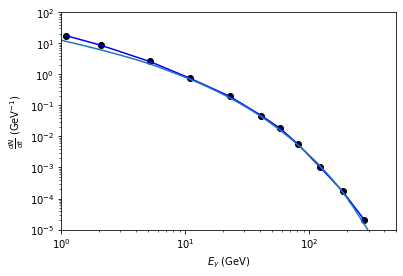

In [117]:
plt.scatter(correct_plot[0], correct_plot[1], color = 'black')
plt.plot(xarr, yarr(xarr), color = 'blue')

plt.plot(x[1], x[2])
plt.yscale('log')
plt.xscale('log')
plt.xlim(1, 500)
plt.ylim(1e-5, 1e2)
plt.xlabel(r'$E_{\gamma}$ (GeV)')
plt.ylabel(r'$\frac{dN}{dt}$ (GeV$^{-1}$)')